# Model testing on InceptionV3 architecture
1. Top 2 finetuned fodel
2. Total finetuned model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image
from keras.utils import load_img

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/models/model_finetuned_09-0.98.h5')

In [ ]:
targetImg = "/content/drive/MyDrive/Dataset/apple.jpeg"

In [ ]:
def load_image(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224, 224) )
    img = img /255
    return img

classes=['Apple_Apple_scab' ,'Apple_Black_rot', 'Apple_Cedar_apple_rust',
'Apple_healthy', 'Blueberry_healthy',
'Cherry_(including_sour)_Powdery_mildew',
'Cherry_(including_sour)_healthy',
'Corn_(maize)_Cercospora_leaf_spot_Gray_leaf_spot',
'Corn_(maize)_Common_rust_', 'Corn_(maize)_Northern_Leaf_Blight',
'Corn_(maize)_healthy', 'Grape_Black_rot',
'Grape_Esca_(Black_Measles)',
'Grape_Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape_healthy',
'Orange_Haunglongbing_(Citrus_greening)', 'Peach_Bacterial_spot',
'Peach_healthy' ,'Pepper_bell_Bacterial_spot',
'Pepper_bell_healthy' ,'Potato_Early_blight', 'Potato_Late_blight',
'Potato_healthy', 'Raspberry_healthy', 'Soybean_healthy',
'Squash_Powdery_mildew' ,'Strawberry_Leaf_scorch',
'Strawberry_healthy', 'Tomato_Bacterial_spot' ,'Tomato_Early_blight',
'Tomato_Late_blight' ,'Tomato_Leaf_Mold' ,'Tomato_Septoria_leaf_spot',
'Tomato_Spider_mites_Two-spotted_spider_mite' ,'Tomato_Target_Spot',
'Tomato_Tomato_Yellow_Leaf_Curl_Virus' ,'Tomato_Tomato_mosaic_virus',
'Tomato_healthy']

def predict(image):
    probabilities = new_model.predict(np.asarray([load_image(targetImg)]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

In [ ]:
def show():  
  img = load_image(str(targetImg))
  prediction = predict(img)
  print("Image: %s, Predicted class: %s, Confidence Score: %f" % (os.path.basename(targetImg), list(prediction.keys())[0], list(prediction.values())[0]))
  plt.imshow(img)
  plt.show()

1/1 [==============================] - 0s 223ms/step
Image: apple.jpeg, Predicted class: Strawberry_Leaf_scorch, Confidence Score: 0.421934


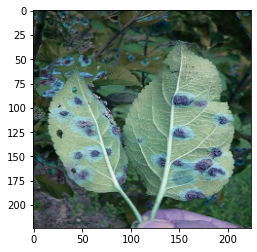

In [ ]:
show()